In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set Dataset Path
data_dir = '/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 3 (PRAICP-1008- 5 Flower Classification)/Data/flower-classes-5/flower_photos'

In [4]:
# Data Preparation with Augmentation
img_size = 224
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)



Found 2963 images belonging to 5 classes.
Found 737 images belonging to 5 classes.


In [6]:
# Step 5: Load Pretrained Model (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Building Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1098s 12s/step - accuracy: 0.5301 - loss: 1.2881 - val_accuracy: 0.8223 - val_loss: 0.5346
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7567 - loss: 0.6591 - val_accuracy: 0.8331 - val_loss: 0.4891
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.7766 - loss: 0.5699 - val_accuracy: 0.8358 - val_loss: 0.4407
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8139 - loss: 0.5045 - val_accuracy: 0.8521 - val_loss: 0.4253
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8120 - loss: 0.4987 - val_accuracy: 0.8562 - val_loss: 0.4315
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8313 - loss: 0.4452 - val_accuracy: 0.8548 - val_loss: 0.4138
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8331 - loss: 0.4514 - val_accuracy: 0.8684 - val_loss: 0.3930
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8427 - loss: 0.4239 - val_accuracy: 0.8467 -

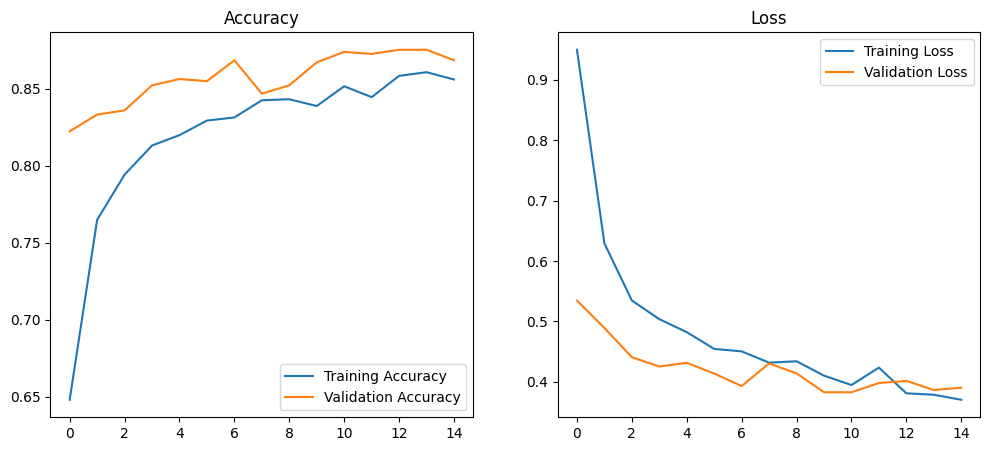

In [9]:
#Plot Accuracy & Loss
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_metrics(history)

In [10]:
# Save the Model
model.save('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 3 (PRAICP-1008- 5 Flower Classification)/Project 3(PRAICP-1008-5 Flower Classification)/flower_classification_model.h5')

In [11]:
# Prediction Function
from tensorflow.keras.preprocessing import image

def predict_flower(image_path, model, class_indices):
    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = list(class_indices.keys())[np.argmax(predictions)]

    print(f"Predicted Flower: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
Predicted Flower: tulips


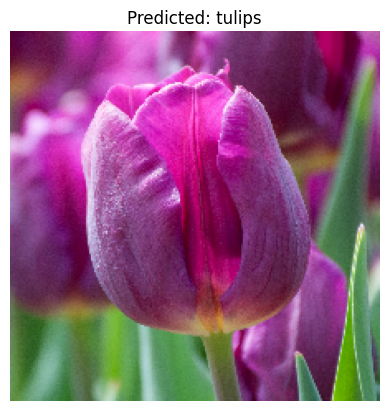

In [17]:

# To use:
predict_flower('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 3 (PRAICP-1008- 5 Flower Classification)/Data/1504_BestPurple_CGC2662sq.jpg', model, train_generator.class_indices)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Flower: roses


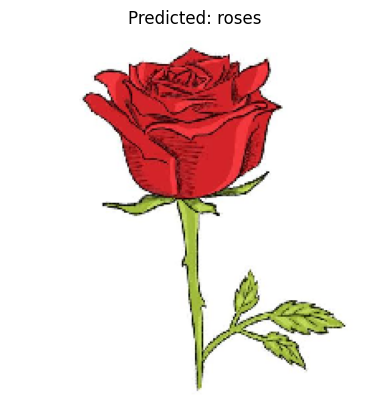

In [18]:
# To use:
predict_flower('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 3 (PRAICP-1008- 5 Flower Classification)/Data/images.jpeg', model, train_generator.class_indices)

